tgb - 5/29/2019 - Meant as a simplification of https://github.com/tbeucler/CBRAIN-CAM/blob/master/notebooks/stephans-devlog/6.2-Debug-cut-off-runs.ipynb.  
The goals will be:  
1) To calculate the Jacobian without eager execution following https://gist.github.com/raspstephan/96cba1283adcbeb3dab553b5494481e3#file-jac-no-eager-ipynb  
2) To map the min and max of the eigenvalues around the instability to show the decrease in range and increase in min as an instability develops

# 1) Load CBRAIN and 8-col case

In [4]:
from cbrain.imports import *
from cbrain.data_generator import *
from cbrain.utils import *
from cbrain.normalization import *
%matplotlib inline

In [5]:
CAMDIR = '/scratch/05488/tg847872/revision_debug/'
cam_ds = xr.open_mfdataset(CAMDIR+ 'debug.cam2.h1.*.nc', decode_times=False, concat_dim='time')

In [6]:
in_vars = ['QBP', 'TBP', 'VBP', 'PS', 'SOLIN', 'SHFLX', 'LHFLX']
out_vars = ['PHQ', 'TPHYSTND', 'FSNT', 'FSNS', 'FLNT', 'FLNS', 'PRECT']

scale_dict = load_pickle('../../nn_config/scale_dicts/002_pnas_scaling.pkl')

input_transform = InputNormalizer(
    xr.open_dataset(f'{CAMDIR}/001_norm.nc'),
    in_vars,
    'mean', 'maxrs',
    var_cut_off={'QBP':14, 'TBP':14}
)

In [7]:
from cbrain.models import fc_model
model = fc_model(66, 65, [256]*9, 'LeakyReLU')
model.load_weights(
    f'{CAMDIR}weights.h5'
)

Instructions for updating:
Colocations handled automatically by placer.


# 2) Crash animation using Holoview

In [8]:
import holoviews as hv
hv.extension('matplotlib')
def anim(da, dims=['lon', 'lat'], **kwargs):
    ds = hv.Dataset(da)
    return ds.to(hv.Image, dims, rtol=100).options(**kwargs)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [9]:
cam_ds = xr.open_mfdataset(CAMDIR+ 'debug.cam2.h1.*.nc', 
                           decode_times=False, concat_dim='time')

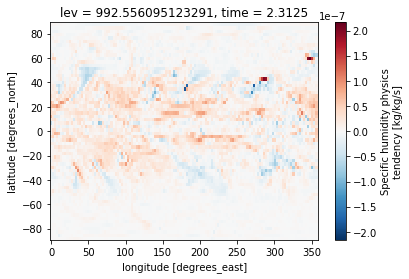

In [10]:
cam_ds.PHQ.isel(time=-50, lev=-1).plot()

# 3) Jacobian functions without eager_execution

In [12]:
from tensorflow.python.ops.parallel_for.gradients import batch_jacobian
def get_jacobian(x, model):
    sess = tf.keras.backend.get_session()
    jac = jacobian(model.output, model.input)
    J = sess.run(jac, feed_dict={model.input: x.astype(np.float32)[None]})
    return J.squeeze()
def get_batch_jacobian(x, model):
    sess = tf.keras.backend.get_session()
    jac = batch_jacobian(model.output, model.input)
    J = sess.run(jac, feed_dict={model.input: x.astype(np.float32)})
    return J.squeeze()

In [26]:
from tensorflow.python.platform import flags
from numpy import linalg as LA

NN = model
t_array = [-50]
Nt = len(t_array)
TQ_sp = np.zeros((Nt,128,2))
Q_sp = np.copy(TQ_sp)
T_sp = np.copy(TQ_sp)
coormax = np.zeros((Nt,2))

cf_inp = np.zeros((1,66))
for index in range (66):
    if index<16: cf_inp[0,index]=L_V;
    elif index<32: cf_inp[0,index]=C_P;
    else: cf_inp[0,index]=1;
        
cf_oup = np.zeros((1,65))
for index in range (65):
    if index<30: cf_oup[0,index]=L_V;
    elif index<60: cf_oup[0,index]=C_P;
    else: cf_oup[0,index]=1;

for it,t in enumerate(t_array):
    ilat_max = np.argmax(cam_ds.PHQ.isel(time=t, lev=-1).max('lon').values)
    ilon_max = np.argmax(cam_ds.PHQ.isel(time=t, lev=-1).max('lat').values)
    print('it=',it,'/',Nt-1,' t=',t,' ilat,ilon,lat,lon=',\
          ilat_max, ilon_max, \
          cam_ds.lat[ilat_max].values, cam_ds.lon[ilon_max].values)
        
    for ilon in range(128):

        print('ilon=',ilon,'/127 ',end="\r")

        in_vec = np.concatenate([
            cam_ds.NNQBP.isel(time=t, lat=ilat_max, lon=ilon, lev=slice(14, None)).values,
            cam_ds.NNTBP.isel(time=t, lat=ilat_max, lon=ilon, lev=slice(14, None)).values,
            cam_ds.NNVBP.isel(time=t, lat=ilat_max, lon=ilon).values,
            cam_ds.NNPS.isel(time=t, lat=ilat_max, lon=ilon).values[None],
            cam_ds.NNSOLIN.isel(time=t, lat=ilat_max, lon=ilon).values[None],
            cam_ds.NNSHF.isel(time=t, lat=ilat_max, lon=ilon).values[None],
            cam_ds.NNLHF.isel(time=t, lat=ilat_max, lon=ilon).values[None],
        ])[None, :]

        inp = input_transform.transform(in_vec)
        J = get_jacobian(inp[0], NN)

it= 0 / 0  t= -50  ilat,ilon,lat,lon= 53 124 59.9970201084913 348.75


/home1/05823/tg851228/miniconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


ValueError: No converter defined for LeakyReluGrad
name: "loop_body_4/gradients/leaky_re_lu_8/LeakyRelu_grad/LeakyReluGrad"
op: "LeakyReluGrad"
input: "loop_body_4/gradients/dense_9/MatMul_grad/MatMul"
input: "dense_8/BiasAdd"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "alpha"
  value {
    f: 0.30000001192092896
  }
}

inputs: [WrappedTensor(t=<tf.Tensor 'loop_body_4/gradients/dense_9/MatMul_grad/MatMul/pfor/Reshape_4:0' shape=(?, ?, ?) dtype=float32>, is_stacked=True, is_sparse_stacked=False), WrappedTensor(t=<tf.Tensor 'dense_8/BiasAdd:0' shape=(?, 256) dtype=float32>, is_stacked=False, is_sparse_stacked=False)]. 
Either add a converter or set --op_conversion_fallback_to_while_loop=True, which may run slower

In [25]:
model